In [4]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 3)  # Example: 3 input neurons, 3 output neurons
        self.fc2 = nn.Linear(3, 3)  # Example: 3 input neurons, 3 output neurons
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleNN()

# Manually set the weights for the first layer to [1, 2, 3, 4, 5, 6, 7, 8, 9]
# The weights tensor should match the shape of the layer's weight matrix
fixed_weights = torch.tensor([[1.0, 2.0, 3.0],
                              [4.0, 5.0, 6.0],
                              [7.0, 8.0, 9.0]])
model.fc1.weight.data = fixed_weights

# Optionally, you can also set biases if needed, for example to zeros
model.fc1.bias.data = torch.zeros(model.fc1.bias.size())

# Check the weights to ensure they are set correctly
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"{name} weights: {param.data}")
    elif 'bias' in name:
        print(f"{name} biases: {param.data}")

fc1.weight weights: tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
fc1.bias biases: tensor([0., 0., 0.])
fc2.weight weights: tensor([[-0.1086,  0.3443,  0.4382],
        [ 0.0948,  0.4105, -0.0410],
        [ 0.4659, -0.4888,  0.1039]])
fc2.bias biases: tensor([-0.2957,  0.4160,  0.3593])


In [8]:
import numpy as np
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [9]:
weights_list = np.arange(0, 1, 0.1)
fixed_weights = torch.from_numpy(weights_list)
fixed_weights

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000], dtype=torch.float64)

In [23]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1000, 1) 
        
    def forward(self, x):
        x = self.fc1(x)
        return x

# Instantiate the model
model = SimpleNN()

In [33]:
from torch.nn.parameter import Parameter

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2000, 1) 
        
    def forward(self, x):
        x = self.fc1(x)
        return x

# Instantiate the model
model = SimpleNN()

fixed_weights = torch.linspace(-2, 2, 2000)
model.fc1.weight = Parameter(fixed_weights)

# Print the weights and bias to verify
print("Weights:", model.fc1.weight)
print("Bias:", model.fc1.bias)

Weights: Parameter containing:
tensor([-2.0000, -1.9980, -1.9960,  ...,  1.9960,  1.9980,  2.0000],
       requires_grad=True)
Bias: Parameter containing:
tensor([0.0135], requires_grad=True)


In [34]:
from aihwkit.simulator.configs import InferenceRPUConfig
from aihwkit.nn.conversion import convert_to_analog
from aihwkit.inference import PCMLikeNoiseModel
import matplotlib.pyplot as plt
from aihwkit.simulator.presets.devices import PCMPresetDevice

rpu_config = InferenceRPUConfig()
rpu_config.device = PCMPresetDevice()

analog_model = convert_to_analog(model, rpu_config)

In [39]:
analog_model

AnalogWrapperSimpleNN(
  (fc1): AnalogLinear(
    in_features=2000, out_features=1, bias=True, InferenceRPUConfig
    (analog_module): TileModuleArray(
      (array): ModuleList(
        (0-3): 4 x ModuleList(
          (0): InferenceTile(RPUPulsed<float>[SimpleRPUDevice](1,500))
        )
      )
    )
  )
)

In [58]:
a_weights = analog_model.get_weights()

# print(analog_model.get_weights())
plt.hist(a_weights.reshape(-1), 1000)
plt.show()
# plt.savefig('before_drift.png')
# plt.clf()


AttributeError: 'collections.OrderedDict' object has no attribute 'reshape'

(tensor([[-2.0000, -1.9980, -1.9960,  ...,  1.9960,  1.9980,  2.0000]]), tensor([-0.0209]))


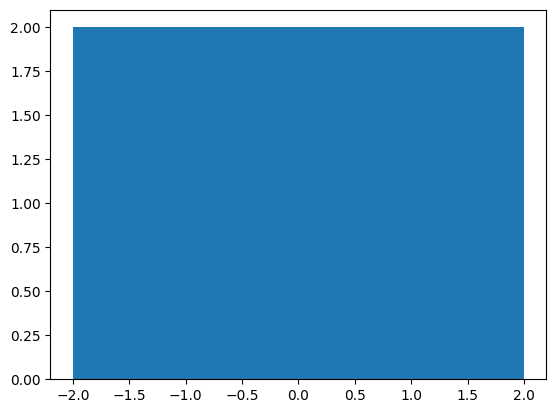

tensor([-2.0000, -1.9980, -1.9960,  ...,  1.9960,  1.9980,  2.0000])


In [81]:
test_layer = nn.Linear(2000, 1)

linspace_tensor = torch.linspace(-2, 2, 2000)

#forcing_tensor = Parameter(Tensor([[1.2, 0, -1.5, 0],[2, -3, 0, 0]]))
forcing_tensor = Parameter(linspace_tensor)

test_layer.weight = forcing_tensor

rpu_config = InferenceRPUConfig()
rpu_config.device = PCMPresetDevice()

# print(rpu_config.device)
# rpu_config.noise_model = PCMLikeNoiseModel(g_max=500)

analog_model = convert_to_analog(test_layer, rpu_config)

print(analog_model.get_weights())
a_weights, _ = analog_model.get_weights()
plt.hist(a_weights.reshape(-1), 1000)
plt.show()
print(a_weights.reshape(-1))
# plt.savefig('before_drift.png')
# plt.clf()

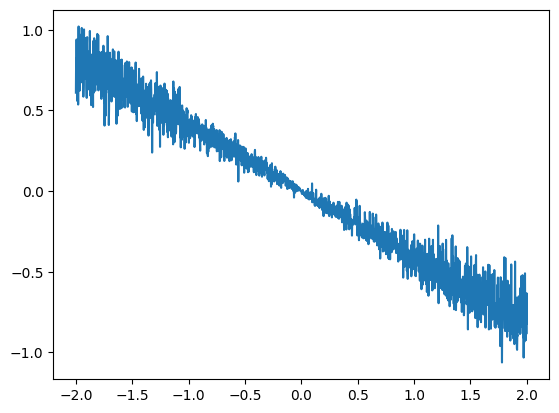

In [84]:
analog_model.eval() 
t_inf = 1e6

analog_model.drift_analog_weights(t_inf)
a_after_weights, _ = analog_model.get_weights()

weight_change = a_after_weights - a_weights
init_weights_vec = a_weights.reshape(-1)
after_weight_vec = a_after_weights.reshape(-1)
weight_change_vec = weight_change.reshape(-1)
weight_change_ratio = weight_change_vec / init_weights_vec 

plt.plot(a_weights.reshape(-1), weight_change_vec)
plt.show()

In [72]:
init_weights_vec

tensor([-2.0000, -1.9980, -1.9960,  ...,  1.9960,  1.9980,  2.0000])

In [73]:
a_weights

tensor([[-2.0000, -1.9980, -1.9960,  ...,  1.9960,  1.9980,  2.0000]])

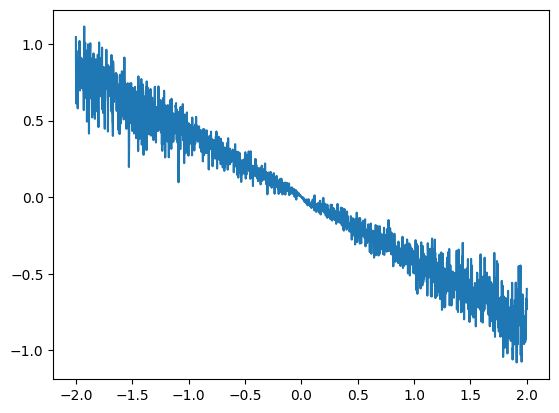

In [116]:
model = nn.Linear(2000, 1)

fixed_weights = torch.linspace(-2, 2, 2000)
model.weight = Parameter(fixed_weights)

# Print the weights and bias to verify
# print("Weights:", model.weight)
# print("Bias:", model.bias)

rpu_config = InferenceRPUConfig()
rpu_config.device = PCMPresetDevice()

analog_model = convert_to_analog(model, rpu_config)

# get initial weights
init_weights, _ = analog_model.get_weights()
init_weights_vec = init_weights.reshape(-1)   # convert to (N,1) tensor

# setting inference mode
analog_model.eval() 
t_inf = 1e6

# get weights after t_inf
analog_model.drift_analog_weights(t_inf)
after_weights, _ = analog_model.get_weights()
after_weights_vec = after_weights.reshape(-1)

# delta weight = after = initial weight
weight_change = after_weights - init_weights
weight_change_vec = weight_change.reshape(-1)

# weight change ratio = delta / initial
weight_change_ratio = weight_change_vec / (init_weights_vec )

# plotting
plt.plot(init_weights_vec, weight_change_vec)
plt.show()



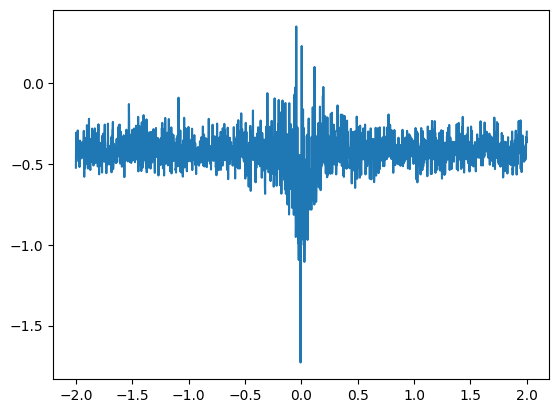

In [117]:

plt.plot(init_weights_vec, weight_change_ratio)
plt.show()

In [106]:
new = init_weights_vec + 1e-5

In [107]:
new[995:1005]


tensor([-0.0090, -0.0070, -0.0050, -0.0030, -0.0010,  0.0010,  0.0030,  0.0050,
         0.0070,  0.0090])

In [108]:
f"{new[1000]:.20f}"

'0.00101043225731700659'

In [109]:
f"{init_weights_vec[1000]:.20f}"

'0.00100043229758739471'

In [110]:
new[1000] == init_weights_vec[1000]

tensor(False)

In [111]:
new[1000] - init_weights_vec[1000]

tensor(1.0000e-05)

In [10]:
import torch

a = torch.tensor([0,1,2,3,4,5])
print(a)
# torch.randn_like(a)

tensor([0, 1, 2, 3, 4, 5])


In [7]:
b = torch.rand(3)
b

tensor([0.6982, 0.1036, 0.9529])

In [8]:
torch.randn_like(b)

tensor([-1.6190,  0.1443, -0.5946])

In [12]:
c = torch.tensor([1.0, 2.0, 3.0])
torch.randn_like(c)

tensor([-0.2875, -0.6400,  0.8500])

In [15]:
fixed_weights = torch.linspace(-2, 2, 2000)
fixed_weights[999:1002]

tensor([-0.0010,  0.0010,  0.0030])

In [16]:
import pandas as pd
import numpy as np

# torch related methods
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from aihwkit.simulator.configs import InferenceRPUConfig
from aihwkit.nn.conversion import convert_to_analog
from aihwkit.inference import PCMLikeNoiseModel
import matplotlib.pyplot as plt
from aihwkit.simulator.presets.devices import PCMPresetDevice

from customized_noise_pcm import TestNoiseModel

model = nn.Linear(2000, 1)

fixed_weights = torch.linspace(-2, 2, 2000)
model.weight = Parameter(fixed_weights)

rpu_config = InferenceRPUConfig()
rpu_config.device = PCMPresetDevice()       # change to paired PCM devices (Gp-Gm)
rpu_config.noise_model = TestNoiseModel()   # change to customized noise model

analog_model = convert_to_analog(model, rpu_config)

# get initial weights
init_weights, _ = analog_model.get_weights()

In [24]:
init_weights.reshape(-1)[999:1002]

tensor([-0.0010,  0.0010,  0.0030])

In [25]:
init_weights_vec = init_weights.reshape(-1)   # convert to (N,1) tensor

# setting inference mode
analog_model.eval() 
t_inf = 1e6

# get weights after t_inf
analog_model.drift_analog_weights(t_inf)
after_weights, _ = analog_model.get_weights()
after_weights_vec = after_weights.reshape(-1)

In [31]:
after_weights_vec[995:1010]

tensor([ 4.4236e-06,  0.0000e+00, -8.5801e-03,  3.6915e-03,  0.0000e+00,
        -1.5834e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.3794e-03,
         1.3951e-03,  6.7362e-04,  8.4416e-03,  3.0576e-04,  2.9640e-03])

In [33]:
# delta weight = after = initial weight
weight_change = after_weights - init_weights
weight_change_vec = weight_change.reshape(-1)

# weight change ratio = delta / initial
weight_change_ratio = weight_change_vec / (init_weights_vec)

In [37]:
weight_change_vec[990:1010]  # csv로 빼서 변화큰 애들이 어디에 위치해있는지 확인해보기

tensor([ 0.0094,  0.0121,  0.0085,  0.0142,  0.0122,  0.0090,  0.0070, -0.0036,
         0.0067,  0.0010, -0.0026, -0.0030, -0.0050, -0.0070, -0.0036, -0.0096,
        -0.0123, -0.0066, -0.0167, -0.0160])

In [38]:
a = torch.tensor([1,2,3])
b = torch.tensor([3,2,1])
np.log(a/b)

tensor([-1.0986,  0.0000,  1.0986])

In [40]:
rpu_config = InferenceRPUConfig()
rpu_config.device = PCMPresetDevice() 
rpu_config.device

PCMPresetDevice(construction_seed=0, corrupt_devices_prob=0.0, corrupt_devices_range=0.1, diffusion=0.0, diffusion_dtod=0.0, drift=DriftParameter(nu=0.0, t_0=1.0, reset_tol=1e-07, nu_dtod=0.0, nu_std=0.0, wg_ratio=1.0, g_offset=0.0, w_offset=0.0, nu_k=0.0, log_g0=0.0, w_noise_std=0.0), dw_min=0.01, dw_min_dtod=0.2, dw_min_dtod_log_normal=False, dw_min_std=0.6, enforce_consistency=True, lifetime=0.0, lifetime_dtod=0.0, perfect_bias=False, reset=0.01, reset_dtod=0.02, reset_std=0.01, up_down=0.0, up_down_dtod=0.05, w_max=2.0, w_max_dtod=0.1, w_min=0.0, w_min_dtod=0.0, count_pulses=False, A_up=-27.235, A_down=-2.235, gamma_up=2.5, gamma_down=2.5, a=-1.0, b=0.0, dw_min_std_add=0.042, dw_min_std_slope=0.108, write_noise_std=0.0, apply_write_noise_on_set=True)

In [41]:
rpu_config.device.drift

DriftParameter(nu=0.0, t_0=1.0, reset_tol=1e-07, nu_dtod=0.0, nu_std=0.0, wg_ratio=1.0, g_offset=0.0, w_offset=0.0, nu_k=0.0, log_g0=0.0, w_noise_std=0.0)

In [42]:
from aihwkit.simulator.parameters.inference import DriftParameter

my_driftparam = DriftParameter()

In [43]:
my_driftparam.wg_ratio = 2.0

In [44]:
rpu_config.device.drift = my_driftparam

In [45]:
rpu_config.device

PCMPresetDevice(construction_seed=0, corrupt_devices_prob=0.0, corrupt_devices_range=0.1, diffusion=0.0, diffusion_dtod=0.0, drift=DriftParameter(nu=0.0, t_0=1.0, reset_tol=1e-07, nu_dtod=0.0, nu_std=0.0, wg_ratio=2.0, g_offset=0.0, w_offset=0.0, nu_k=0.0, log_g0=0.0, w_noise_std=0.0), dw_min=0.01, dw_min_dtod=0.2, dw_min_dtod_log_normal=False, dw_min_std=0.6, enforce_consistency=True, lifetime=0.0, lifetime_dtod=0.0, perfect_bias=False, reset=0.01, reset_dtod=0.02, reset_std=0.01, up_down=0.0, up_down_dtod=0.05, w_max=2.0, w_max_dtod=0.1, w_min=0.0, w_min_dtod=0.0, count_pulses=False, A_up=-27.235, A_down=-2.235, gamma_up=2.5, gamma_down=2.5, a=-1.0, b=0.0, dw_min_std_add=0.042, dw_min_std_slope=0.108, write_noise_std=0.0, apply_write_noise_on_set=True)

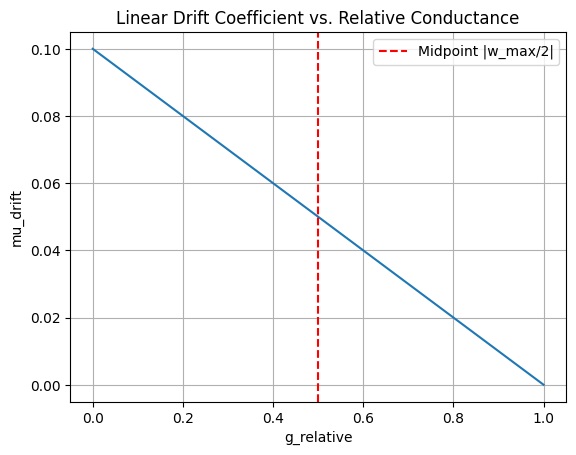

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate g_relative
g_relative = np.linspace(0, 1, 1000)

# Linear drift function
mu_linear = -0.1 * g_relative + 0.1

plt.plot(g_relative, mu_linear)
plt.xlabel('g_relative')
plt.ylabel('mu_drift')
plt.title('Linear Drift Coefficient vs. Relative Conductance')
plt.grid(True)
plt.axvline(x=0.5, color='r', linestyle='--', label='Midpoint |w_max/2|')
plt.legend()
plt.show()
